In [1]:
import pandas as pd
import pandas as pd1
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import seaborn as sns
import math
sns.set_theme(color_codes=True)

%matplotlib inline

%matplotlib inline

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://i2.wp.com/www.bollywoodnewsworld.com/wp-content/uploads/2017/04/top-Bollywood-movies.jpg?w=533&ssl=1")


In [3]:
df=pd.read_csv('/Users/balance/Desktop/Udacity/Udacity Data Analasisi/Udacity_DataAnalysis-2/databases/Database_TMDb_movie_data/tmdb-movies.csv')

df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
imdb_id - 0%
popularity - 0%
budget - 0%
revenue - 0%
original_title - 0%
cast - 1%
homepage - 73%
director - 0%
tagline - 26%
keywords - 14%
overview - 0%
runtime - 0%
genres - 0%
production_companies - 9%
release_date - 0%
vote_count - 0%
vote_average - 0%
release_year - 0%
budget_adj - 0%
revenue_adj - 0%


In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
df.query('imdb_id=="tt0411951"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
df.shape

(10866, 21)

In [11]:
df.drop_duplicates().shape

(10865, 21)

In [12]:
##  find out most productive diretors

df['director'].value_counts()[:15]

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Wes Craven           19
Barry Levinson       19
Mike Nichols         18
Rob Reiner           18
David Cronenberg     18
Name: director, dtype: int64

In [13]:
## Question2 - 10 best rating movies 

### Before getting started with this -

### we need a metric to score or rate movie
### Calculate the score for every movie
### Sort the scores and recommend the best rated movie to the users.
### We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 
### 9.0 average rating and only 2 votes cannot be considered better than the movie with 
### 7.0 as as average rating but 60 votes. 
### so, I'll be using IMDB's weighted rating (wr) which is given as


#### V is the number of votes for the movie;
#### M is the minimum votes required to be listed in the chart;
#### R is the average rating of the movie; And
#### C is the mean vote across the whole report
#### We already have v(vote_count) and R (vote_average) and C can be calculated as

C= df['vote_average'].mean()
C

5.974921774342001

In [14]:
### The next step is to determine an appropriate value for M, 
### the minimum votes required to be listed in the chart. 
### We will use 90th percentile as our cutoff. 
### In other words, for a movie to feature in the statistic, 
### it must have more votes than at least 50% of the movies in the list.

M= df['vote_count'].quantile(0.5)
M

38.0

In [15]:
### Now, we can filter out the movies that qualify for the chart 

q_movies = df.copy().loc[df['vote_count'] >= M]
q_movies.shape

(5469, 21)

In [16]:
def weighted_rating(x, M=M, C=C):
    V = x['vote_count']
    R = x['vote_average']
#### Calculation based on the IMDB formula
    return (V/(V+M) * R) + (M/(M+V) * C)




IMDB uses this famous formula:

weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

 where:
  R = average for the movie (mean) = (Rating)
  v = number of votes for the movie = (votes)
  m = minimum votes required to be listed in the Top 250 (currently 1250)
  C = the mean vote across the whole report (currently 6.8)

This formula is exceedingly useful, but I have beef with the "m"
variable, because it's arbitrary. As far as I can tell, the other
three variables should be enough to calculate what score a movie would
have if it had a quadrillion votes.

In [17]:
weighted_rating

<function __main__.weighted_rating(x, M=38.0, C=5.974921774342001)>

In [18]:
## Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [19]:
q_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6.496437
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,7.093130
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,6.295094
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,7.489127
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,7.283131


In [20]:
## Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies
### Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

In [21]:
q_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score
4178,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,NaN,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,...,142,Drama|Crime,Castle Rock Entertainment,9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07,8.384090
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09,8.277956
650,244786,tt2582802,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,http://sonyclassics.com/whiplash/,Damien Chazelle,The road to greatness can take you to the edge.,...,105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07,8.164916
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,http://thedarkknight.warnerbros.com/dvdsite/,Christopher Nolan,Why So Serious?,...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09,8.090466
2409,550,tt0137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,How much can you know about yourself if you've...,...,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,10/14/99,5923,8.1,1999,8.247033e+07,1.320229e+08,8.086453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,218043,tt2467046,2.601775,16000000,19682924,Left Behind,Nicolas Cage|Chad Michael Murray|Lea Thompson|...,http://www.leftbehindmovie.com/,Vic Armstrong,The End Begins,...,110,Thriller|Action|Science Fiction,Stoney Lake Entertainment,10/3/14,253,3.8,2014,1.473746e+07,1.812977e+07,4.084010
102,241251,tt3181822,1.651078,4000000,50163103,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,http://www.theboynextdoorfilm.com/,Rob Cohen,A Moment She Couldn't Resist. An Obsession He ...,...,91,Thriller,Universal Pictures|Nuyorican Productions|Blumh...,1/23/15,810,3.9,2015,3.679998e+06,4.615003e+07,3.992980
3134,13805,tt1213644,0.812489,25000000,14109284,Disaster Movie,Matt Lanter|Vanessa Lachey|Nicole Ari Parker|C...,http://www.disastermovie.net/,Jason Friedberg|Aaron Seltzer,Your favorite movies are going to be destroyed.,...,87,Action|Comedy,Grosvenor Park Media Ltd.|LionsGate|3 in the Box,8/29/08,130,3.3,2008,2.531967e+07,1.428969e+07,3.905042
7526,9760,tt0799949,0.571060,20000000,86865564,Epic Movie,Kal Penn|Adam Campbell|Jennifer Coolidge|Jayma...,NaN,Jason Friedberg|Aaron Seltzer,We know it's big. We measured.,...,86,Action|Adventure|Comedy,Twentieth Century Fox Film Corporation|Regency...,1/25/07,170,3.4,2007,2.103337e+07,9.135378e+07,3.870418


In [22]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [23]:
### remove the columns which are not usuful 

q_movies=q_movies.drop(columns=['homepage','tagline'])

In [24]:
q_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score
4178,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,prison|corruption|police brutality|prison cell...,Framed in the 1940s for the double murder of h...,142,Drama|Crime,Castle Rock Entertainment,9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07,8.38409


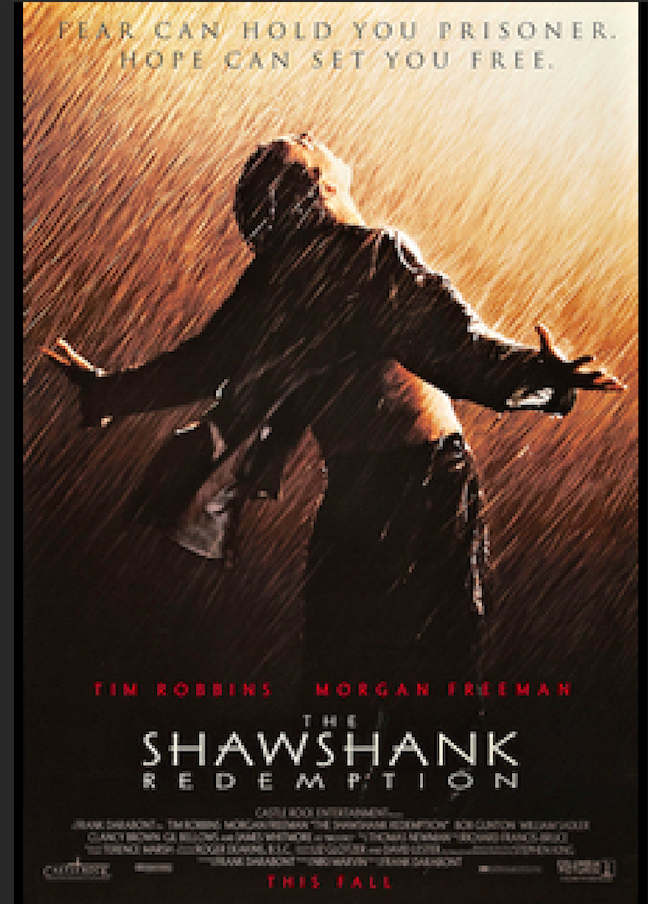

In [45]:
Image(filename='/Users/balance/Desktop/Udacity Project review/shaw2.png')

In [25]:
## Categorized the score Rating level into 4 units ['Poor Rating', 'Fair Rating', 'Good Rating', 'Excellent Rating']

q_movies.score.describe()

count    5469.000000
mean        6.166537
std         0.633971
min         3.465375
25%         5.738693
50%         6.149983
75%         6.570009
max         8.384090
Name: score, dtype: float64

In [26]:
bin_edges = [3.465375,5.738693,6.149983,6.570009,8.384090 ]
bin_names = ['Poor Rating', 'Fair Rating', 'Good Rating', 'Excellent Rating']

q_movies['Rating_Level']=pd.cut(q_movies['score'],bin_edges,labels=bin_names)
q_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score,Rating_Level
4178,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,prison|corruption|police brutality|prison cell...,Framed in the 1940s for the double murder of h...,...,Drama|Crime,Castle Rock Entertainment,9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07,8.384090,Excellent Rating
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,italy|love at first sight|loss of father|patri...,"Spanning the years 1945 to 1955, a chronicle o...",...,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09,8.277956,Excellent Rating
650,244786,tt2582802,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,jazz|obsession|conservatory|music teacher|new ...,"Under the direction of a ruthless instructor, ...",...,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07,8.164916,Excellent Rating


In [27]:
### Creating the column for 'score' ranking 

col1 = q_movies["score"].astype(str) 

q_movies['Rating_Rank'] = (col1).astype(float).rank(method='dense', ascending=False).astype(float)
Rating_Rank=q_movies.sort_values('Rating_Rank')
Rating_Rank.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score,Rating_Level,Rating_Rank
4178,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,prison|corruption|police brutality|prison cell...,Framed in the 1940s for the double murder of h...,...,Castle Rock Entertainment,9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07,8.384090,Excellent Rating,1.0
7269,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,italy|love at first sight|loss of father|patri...,"Spanning the years 1945 to 1955, a chronicle o...",...,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09,8.277956,Excellent Rating,2.0
650,244786,tt2582802,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,jazz|obsession|conservatory|music teacher|new ...,"Under the direction of a ruthless instructor, ...",...,Bold Films|Blumhouse Productions|Right of Way ...,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07,8.164916,Excellent Rating,3.0
2875,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,dc comics|crime fighter|secret identity|scarec...,Batman raises the stakes in his war on crime. ...,...,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09,8.090466,Excellent Rating,4.0
2409,550,tt0137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,support group|dual identity|nihilism|rage and ...,A ticking-time-bomb insomniac and a slippery s...,...,Regency Enterprises|Fox 2000 Pictures|Taurus F...,10/14/99,5923,8.1,1999,8.247033e+07,1.320229e+08,8.086453,Excellent Rating,5.0


In [28]:
q_movies['profit']=(q_movies.revenue-q_movies.budget)

In [29]:
q_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,score,Rating_Level,Rating_Rank,profit
4178,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,prison|corruption|police brutality|prison cell...,Framed in the 1940s for the double murder of h...,...,9/10/94,5754,8.4,1994,3.677779e+07,4.169346e+07,8.38409,Excellent Rating,1.0,3341469


In [30]:
q_movies.profit.describe()

count    5.469000e+03
mean     5.059067e+07
std      1.309738e+08
min     -4.139124e+08
25%      0.000000e+00
50%      3.292353e+06
75%      5.229849e+07
max      2.544506e+09
Name: profit, dtype: float64

In [31]:

### make the "profit" figuer more easy to read
pd.set_option('display.float_format', lambda x: '%.5f' % x)
q_movies.profit.describe()

count         5469.00000
mean      50590670.25014
std      130973765.16717
min     -413912431.00000
25%              0.00000
50%        3292353.00000
75%       52298489.00000
max     2544505847.00000
Name: profit, dtype: float64

In [32]:
### Categorized the 'Profit_level' into 4 units ['Loose Money', 'No Profit', 'Ok Profit', 'Great Profit']

bin_edges = [-413912431,0,1000000,9083358,2544505847 ]
bin_names = ['Loose Money', 'No Profit', 'Ok Profit', 'Great Profit']

q_movies['Profit_Level']=pd.cut(q_movies['profit'],bin_edges,labels=bin_names)
q_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'score', 'Rating_Level',
       'Rating_Rank', 'profit', 'Profit_Level'],
      dtype='object')

In [33]:
q_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,score,Rating_Level,Rating_Rank,profit,Profit_Level
4178,278,tt0111161,7.19204,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,prison|corruption|police brutality|prison cell...,Framed in the 1940s for the double murder of h...,...,5754,8.40000,1994,36777789.03995,41693462.71858,8.38409,Excellent Rating,1.00000,3341469,Ok Profit


In [34]:
q_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'score', 'Rating_Level',
       'Rating_Rank', 'profit', 'Profit_Level'],
      dtype='object')

<Figure size 841.68x595.44 with 0 Axes>

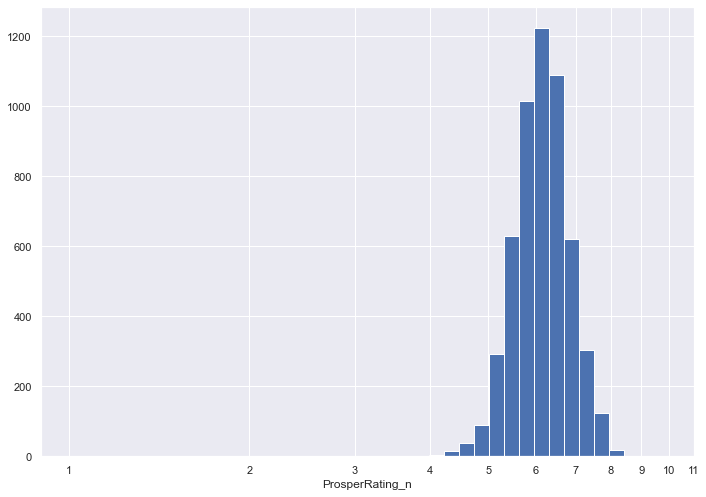

In [35]:
plt.figure(figsize=(11.69, 8.27))
## the data(ProsperRating_n) looks distribued.
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(q_movies['score'].max())+log_binsize, log_binsize)

plt.figure(figsize=(11.69, 8.27))
plt.hist(data = q_movies, x = 'score', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8,9,10,11], [1, 2, 3, 4, 5, 6, 7, 8,9,10,11]);
plt.xlabel('ProsperRating_n');

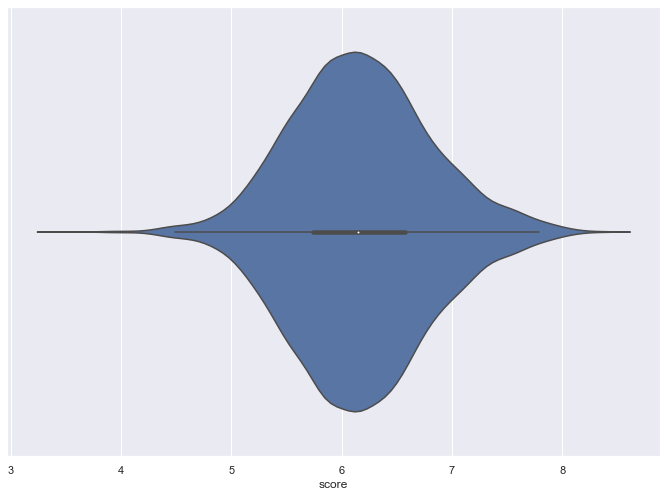

In [36]:
plt.figure(figsize=(11.69, 8.27))
sb.violinplot(data = q_movies, x = 'score',facecolor='gray');

Text(0.5, 1.0, 'The most produced movies genres ranking')

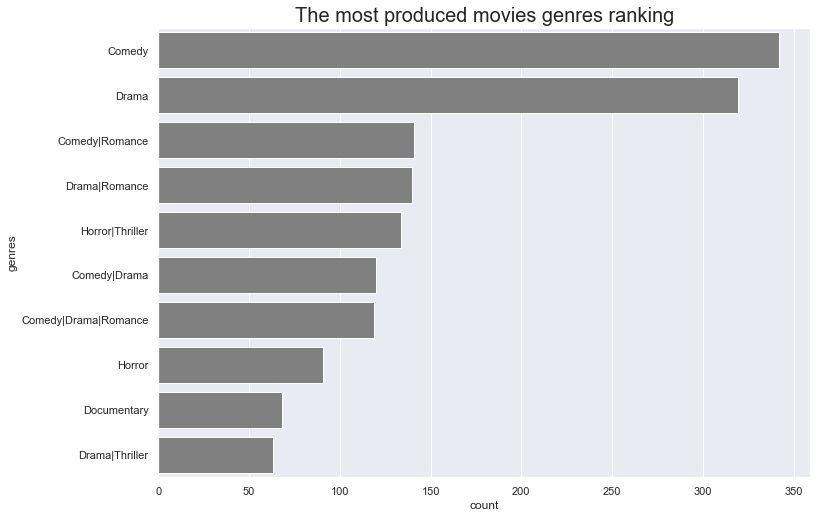

In [37]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='genres',data=q_movies,order=q_movies.genres.value_counts().iloc[:10].index,
            facecolor='gray')
plt.title('The most produced movies genres ranking',fontsize=20)

Text(0.5, 1.0, 'The most produced movies genres ranking')

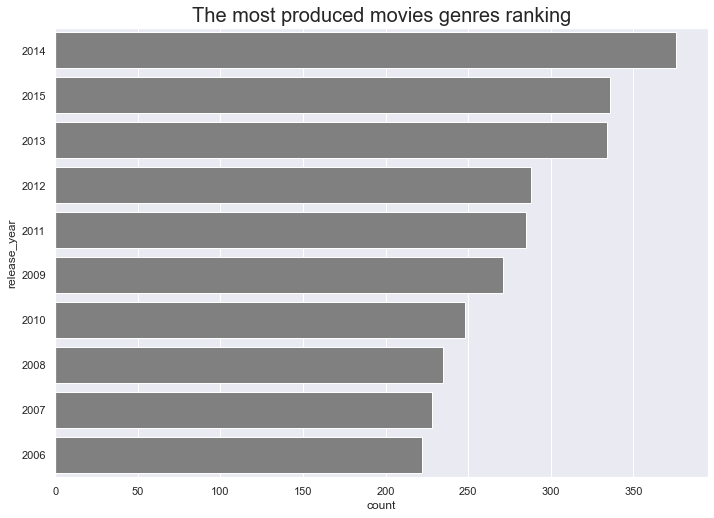

In [38]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='release_year',data=q_movies,order=q_movies.release_year.value_counts().iloc[:10].index,
            facecolor='gray')
plt.title('The most produced movies genres ranking',fontsize=20)

Text(0.5, 1.0, 'The most produced movies director ranking')

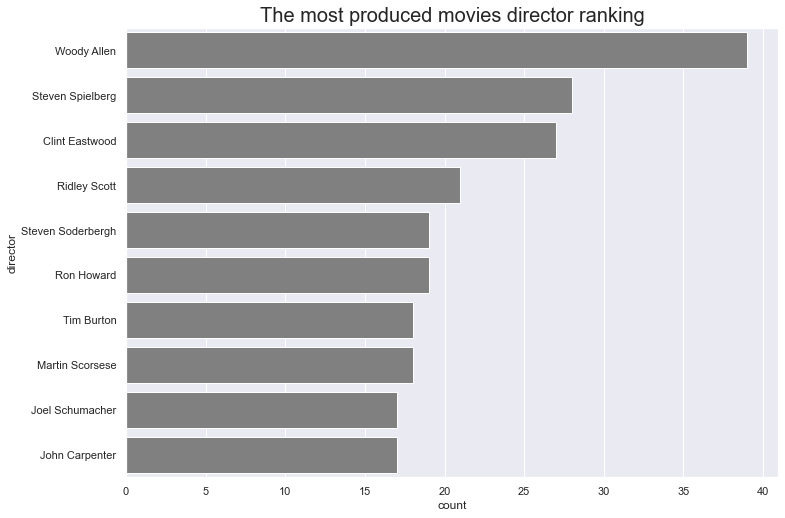

In [39]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='director',data=q_movies,order=q_movies.director.value_counts().iloc[:10].index,
            facecolor='gray')
plt.title('The most produced movies director ranking',fontsize=20)

Text(0.5, 1.0, 'The Keywords/sinificant based on amount counted')

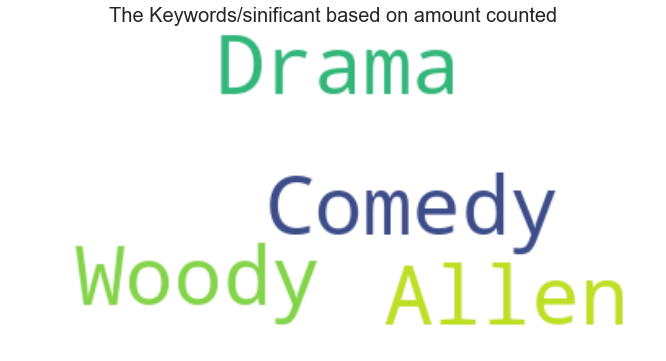

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import inaugural
import matplotlib.pyplot as plt
text=('Comedy,Drama,2014,Woody Allen')
wordcloud = WordCloud(max_font_size=50,max_words=100,background_color="white").generate(text)
plt.figure(figsize=(11.69, 8.27))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show
plt.title('The Keywords/sinificant based on amount counted',fontsize=20)


Bivariate Exploration
Now let’s dive in to find out the factors/feature that affect the loan outcome, and the outcome affecting the estimate return.
1. Here are the features I will pick up for revieing the correlation with the outcome of bad/good loan. Ownership/original amount, current delinquent/prosper rating / income/Debt to income ratio.
2. Here are the features I selecting for reviewing the correlation with estimate return. State, occupations, prosper rating, Loan Listing time.
Estimate Return and Loan Status are the most pay attention features i will focus on,so the other factors will apply to Estimate income and Loan Status

In [55]:
q_movies.Profit_Level.value_counts()

Great Profit    2474
Loose Money     2367
Ok Profit        428
No Profit        199
Name: Profit_Level, dtype: int64

Text(0.5, 1.0, 'Correlation between genres and profits')

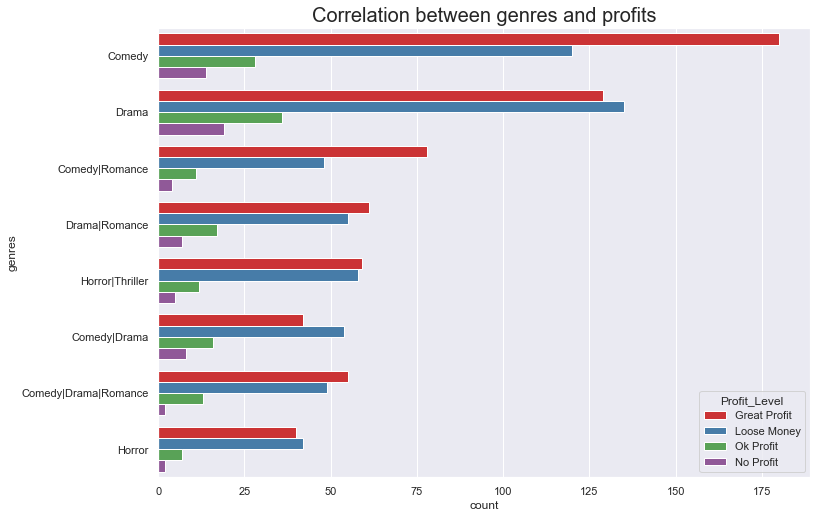

In [51]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='genres',hue='Profit_Level',data=q_movies,order=q_movies.genres.value_counts().iloc[:8].index,
           hue_order=q_movies.Profit_Level.value_counts().iloc[:4].index,palette = "Set1" )
plt.title('Correlation between genres and profits',fontsize=20)

In [54]:
q_movies.profit.describe()

count         5469.00000
mean      50590670.25014
std      130973765.16717
min     -413912431.00000
25%              0.00000
50%        3292353.00000
75%       52298489.00000
max     2544505847.00000
Name: profit, dtype: float64

In [56]:
bin_edges1=[0,50590670,2544505847]
bin_names1=['Not Good Earning','Good Earning']

q_movies["profit1"]=pd.cut(q_movies['profit'],bin_edges1,labels=bin_names1)


In [59]:
q_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'score', 'Rating_Level',
       'Rating_Rank', 'profit', 'Profit_Level', 'profit1'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between genres and profits')

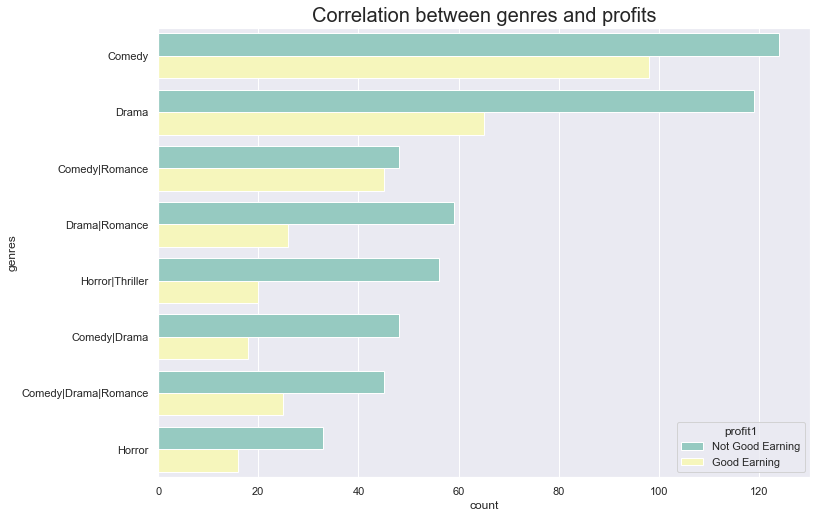

In [61]:
plt.figure(figsize=(11.69, 8.27))
sb.countplot(y='genres',hue='profit1',data=q_movies,order=q_movies.genres.value_counts().iloc[:8].index,
           hue_order=q_movies.profit1.value_counts().iloc[:4].index,palette = "Set3" )
plt.title('Correlation between genres and profits',fontsize=20)

In [73]:
trend1=pd.crosstab(q_movies['genres'],q_movies['Profit_Level']).apply(lambda r: r/r.sum(), axis=1)
trend1.head(10)


Profit_Level,Loose Money,No Profit,Ok Profit,Great Profit
genres,,,,
Action,0.40741,0.03704,0.14815,0.40741
Action|Adventure,0.50000,0.00000,0.12500,0.37500
Action|Adventure|Animation,1.00000,0.00000,0.00000,0.00000
Action|Adventure|Animation|Family,1.00000,0.00000,0.00000,0.00000
Action|Adventure|Animation|Family|Fantasy,0.00000,0.00000,0.00000,1.00000
Action|Adventure|Animation|Family|Science Fiction,0.00000,0.00000,0.00000,1.00000
Action|Adventure|Animation|Fantasy|Horror,1.00000,0.00000,0.00000,0.00000
Action|Adventure|Animation|Science Fiction,0.66667,0.00000,0.33333,0.00000
Action|Adventure|Animation|Science Fiction|Crime,1.00000,0.00000,0.00000,0.00000


In [102]:
q_movies.groupby('genres')['Profit_Level'].value_counts().unstack().fillna(0)

Profit_Level,Loose Money,No Profit,Ok Profit,Great Profit
genres,,,,
Action,11.00000,1.00000,4.00000,11.00000
Action|Adventure,4.00000,0.00000,1.00000,3.00000
Action|Adventure|Animation,3.00000,0.00000,0.00000,0.00000
Action|Adventure|Animation|Family,1.00000,0.00000,0.00000,0.00000
Action|Adventure|Animation|Family|Fantasy,0.00000,0.00000,0.00000,1.00000
...,...,...,...,...
Western|Drama|Adventure|Thriller,0.00000,0.00000,0.00000,1.00000
Western|Drama|Crime|Romance,0.00000,0.00000,1.00000,0.00000
Western|History|War,1.00000,0.00000,0.00000,0.00000


In [ ]:
## here we try to split those genres columns has more than one genres into one
## for better understand and calculate for the genres trend and overview

In [104]:
q_movies.shape, df.shape

((5469, 25), (10866, 21))

In [109]:
q_movies2=q_movies.copy()

In [110]:
q_movies.shape

(5469, 25)

In [114]:
split=q_movies2.genres.str.split('|', expand=True)
split.head()

,0,1,2,3,4
4178,Drama,Crime,None,None,None
7269,Drama,Crime,None,None,None
650,Drama,Music,None,None,None
2875,Drama,Action,Crime,Thriller,None
2409,Drama,None,None,None,None


In [116]:
split1=q_movies2.genres.str.split('|', n=5, expand=True)

q_movies2["First Name"]= split1[0]
q_movies2["Second Name"]= split1[1]
q_movies2["Third Name"]= split1[2]
q_movies2["Fourth Name"]= split1[3]
q_movies2["Fifth Name"]=split1[4]


q_movies2.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,...,Rating_Level,Rating_Rank,profit,Profit_Level,profit1,First Name,Second Name,Third Name,Fourth Name,Fifth Name
4178,278,tt0111161,7.19204,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,prison|corruption|police brutality|prison cell...,Framed in the 1940s for the double murder of h...,...,Excellent Rating,1.00000,3341469,Ok Profit,Not Good Earning,Drama,Crime,None,None,None


In [120]:
genres_split1=q_movies2[['id','release_year','First Name']]
genres_split2=q_movies2[['id','release_year','Second Name']]
genres_split3=q_movies2[['id','release_year','Third Name']]
genres_split4=q_movies2[['id','release_year','Fourth Name']]
genres_split5=q_movies2[['id','release_year','Fifth Name']]


In [121]:
##### change the column name to genres for further appending  
genres_split1=genres_split1.rename(columns={'First Name':'genres'})
genres_split2=genres_split2.rename(columns={'Second Name':'genres'})
genres_split3=genres_split3.rename(columns={'Third Name':'genres'})
genres_split4=genres_split4.rename(columns={'Fourth Name':'genres'})
genres_split5=genres_split5.rename(columns={'Fifth Name':'genres'})

In [122]:
trend_genres=genres_split1.append([genres_split2,genres_split3,genres_split4,genres_split5])
trend_genres.shape

(27345, 3)

In [124]:
trend_genres.head(1)

,id,release_year,genres
4178,278,1994,Drama


In [126]:
trend_counts=trend_genres.groupby('release_year')['genres'].value_counts().unstack().fillna(0)
trend_counts.shape

(56, 20)

In [135]:
trend_counts.head(10)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2.00000,3.00000,0.00000,2.00000,1.00000,0.00000,3.00000,1.00000,1.00000,0.00000,1.00000,2.00000,1.00000,0.00000,2.00000,1.00000,0.00000,4.00000,0.00000,1.00000
1961,1.00000,2.00000,1.00000,2.00000,1.00000,0.00000,5.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1962,2.00000,2.00000,0.00000,0.00000,1.00000,0.00000,6.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,4.00000,2.00000,1.00000
1963,2.00000,5.00000,1.00000,4.00000,2.00000,0.00000,3.00000,3.00000,1.00000,1.00000,2.00000,2.00000,0.00000,2.00000,3.00000,0.00000,0.00000,5.00000,1.00000,0.00000
1964,2.00000,1.00000,1.00000,4.00000,2.00000,0.00000,4.00000,3.00000,1.00000,0.00000,1.00000,0.00000,3.00000,1.00000,1.00000,0.00000,0.00000,2.00000,2.00000,0.00000
1965,1.00000,1.00000,1.00000,2.00000,0.00000,0.00000,3.00000,2.00000,0.00000,0.00000,0.00000,1.00000,2.00000,0.00000,2.00000,0.00000,1.00000,3.00000,1.00000,0.00000
1966,0.00000,2.00000,2.00000,3.00000,2.00000,0.00000,3.00000,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,1.00000,3.00000,0.00000,2.00000,0.00000,0.00000
1967,3.00000,4.00000,1.00000,5.00000,4.00000,0.00000,7.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,3.00000,0.00000,0.00000,3.00000,1.00000,0.00000
1968,2.00000,4.00000,1.00000,5.00000,2.00000,0.00000,7.00000,3.00000,3.00000,0.00000,1.00000,2.00000,3.00000,3.00000,3.00000,3.00000,0.00000,2.00000,1.00000,1.00000


Text(0, 0.5, 'Genres Counts')

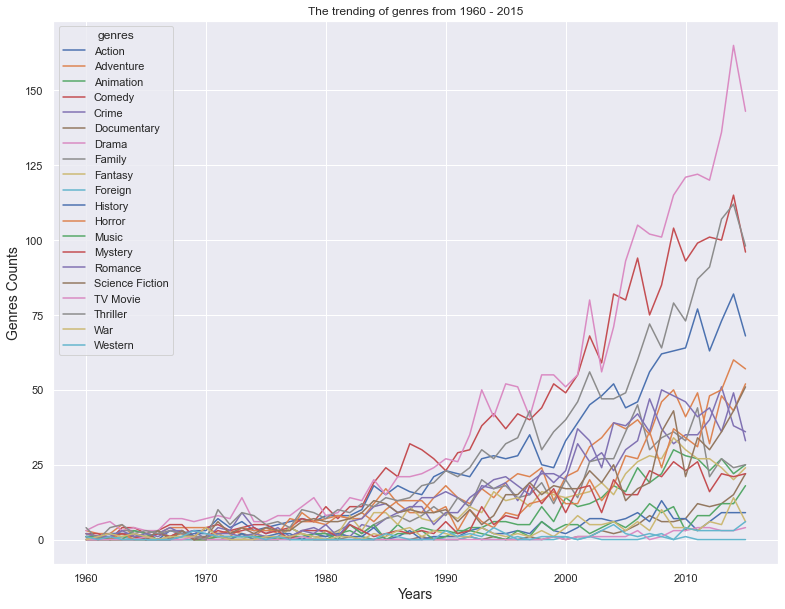

In [136]:
trend_counts.plot.line(figsize=(13,10), title='The trending of genres from 1960 - 2015')
plt.xlabel('Years',fontsize=14)
plt.ylabel('Genres Counts',fontsize=14)

In [149]:
trend_genres.genres.value_counts()

Drama              2372
Comedy             1999
Thriller           1647
Action             1381
Adventure           960
Romance             895
Crime               835
Horror              736
Family              705
Science Fiction     700
Fantasy             569
Mystery             451
Animation           424
Music               189
History             174
War                 147
Documentary         121
Western              69
TV Movie             37
Foreign              10
Name: genres, dtype: int64

In [152]:
trend_genres.head(1)

,id,release_year,genres
4178,278,1994,Drama


In [153]:
trend_genres.genres.describe()

count     14421
unique       20
top       Drama
freq       2372
Name: genres, dtype: object

In [157]:
trend_genres['genres'].isin(['Drama','Comedy']).value_counts()

False    22974
True      4371
Name: genres, dtype: int64

In [158]:
trend_genres.head(1)

,id,release_year,genres
4178,278,1994,Drama


In [76]:
trend2=pd.crosstab(q_movies['production_companies'],q_movies['Profit_Level']).apply(lambda r: r/r.sum(), axis=1)
trend2.head(20)

Profit_Level,Loose Money,No Profit,Ok Profit,Great Profit
production_companies,,,,
10th Hole Productions|Anonymous Content|Ambush Entertainment|Maven Pictures|Foggy Bottom Pictures,1.00000,0.00000,0.00000,0.00000
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions,1.00000,0.00000,0.00000,0.00000
120dB Films|Louisiana Media Productions|Anchor Bay Films|Mimran Schur Pictures|Upload Films,1.00000,0.00000,0.00000,0.00000
120dB Films|Pimienta|The Salt Company International|Private Island Trax|Stun Creative,1.00000,0.00000,0.00000,0.00000
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions,0.00000,1.00000,0.00000,0.00000
1492 Pictures|Dune Entertainment|Fox 2000 Pictures|Sunswept Entertainment|Dune Entertainment III,0.00000,0.00000,0.00000,1.00000
1492 Pictures|Warner Bros.|Heyday Films,0.00000,0.00000,0.00000,1.00000
1492 Pictures|Warner Bros.|Heyday Films|MIRACLE Productions GmbH & Co. KG,0.00000,0.00000,0.00000,1.00000
1492 Pictures|Warner Bros.|Heyday Films|P of A Productions Limited,0.00000,0.00000,0.00000,1.00000


In [78]:
trend_date=q_movies.groupby('release_year')['Profit_Level'].value_counts().unstack().fillna(0)
trend_date.head(10)


Profit_Level,Loose Money,No Profit,Ok Profit,Great Profit
release_year,,,,
1960,4.00000,0.00000,1.00000,3.00000
1961,2.00000,0.00000,2.00000,3.00000
1962,5.00000,0.00000,1.00000,3.00000
1963,6.00000,1.00000,1.00000,4.00000
1964,2.00000,1.00000,2.00000,4.00000
1965,4.00000,0.00000,0.00000,3.00000
1966,6.00000,0.00000,1.00000,2.00000
1967,3.00000,0.00000,1.00000,9.00000
1968,9.00000,0.00000,2.00000,6.00000


Text(0.5, 1.0, 'Profit trend')

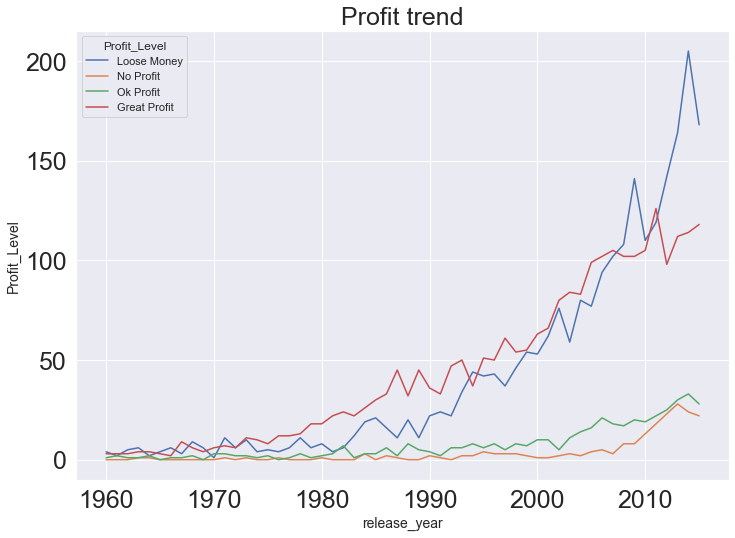

In [79]:
trend_date.plot.line(figsize=(11.69,8.27),title='Profit Treding Chart',fontsize=25)
plt.xlabel('release_year',fontsize=14)
plt.ylabel('Profit_Level',fontsize=14)
plt.title('Profit trend',fontsize=25)

In [83]:
trend_date2=q_movies.groupby('release_year')['profit1'].value_counts().unstack().fillna(0)
trend_date2.head(10)

profit1,Not Good Earning,Good Earning
release_year,,
1960,4.00000,0.00000
1961,4.00000,1.00000
1962,2.00000,2.00000
1963,5.00000,1.00000
1964,4.00000,3.00000
1965,0.00000,3.00000
1966,3.00000,0.00000
1967,6.00000,4.00000
1968,8.00000,0.00000


Text(0.5, 1.0, 'Profit trend')

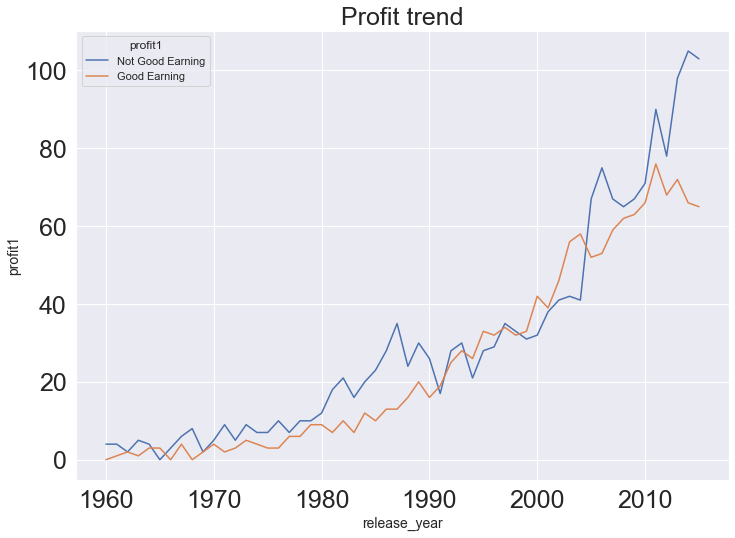

In [84]:
trend_date2.plot.line(figsize=(11.69,8.27),title='Profit Treding Chart',fontsize=25)
plt.xlabel('release_year',fontsize=14)
plt.ylabel('profit1',fontsize=14)
plt.title('Profit trend',fontsize=25)

In [81]:
trend_date1=q_movies.groupby('release_year')['Rating_Level'].value_counts().unstack().fillna(0)
trend_date1.head(10)

Rating_Level,Poor Rating,Fair Rating,Good Rating,Excellent Rating
release_year,,,,
1960,0.00000,0.00000,2.00000,6.00000
1961,0.00000,0.00000,3.00000,4.00000
1962,0.00000,0.00000,2.00000,7.00000
1963,0.00000,0.00000,6.00000,6.00000
1964,0.00000,0.00000,2.00000,7.00000
1965,0.00000,0.00000,3.00000,4.00000
1966,0.00000,1.00000,3.00000,5.00000
1967,1.00000,0.00000,3.00000,9.00000
1968,1.00000,2.00000,5.00000,9.00000


Text(0.5, 1.0, 'Profit trend')

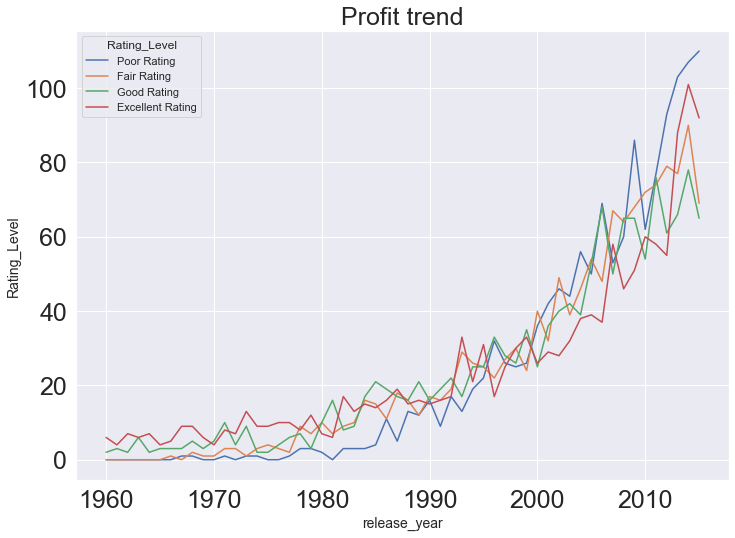

In [82]:
trend_date1.plot.line(figsize=(11.69,8.27),title='Rating Treding Chart',fontsize=25)
plt.xlabel('release_year',fontsize=14)
plt.ylabel('Rating_Level',fontsize=14)
plt.title('Profit trend',fontsize=25)

In [88]:
q_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'score', 'Rating_Level',
       'Rating_Rank', 'profit', 'Profit_Level', 'profit1'],
      dtype='object')

In [90]:
q_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,...,vote_average,release_year,budget_adj,revenue_adj,score,Rating_Level,Rating_Rank,profit,Profit_Level,profit1
4178,278,tt0111161,7.19204,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,prison|corruption|police brutality|prison cell...,Framed in the 1940s for the double murder of h...,...,8.40000,1994,36777789.03995,41693462.71858,8.38409,Excellent Rating,1.00000,3341469,Ok Profit,Not Good Earning


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

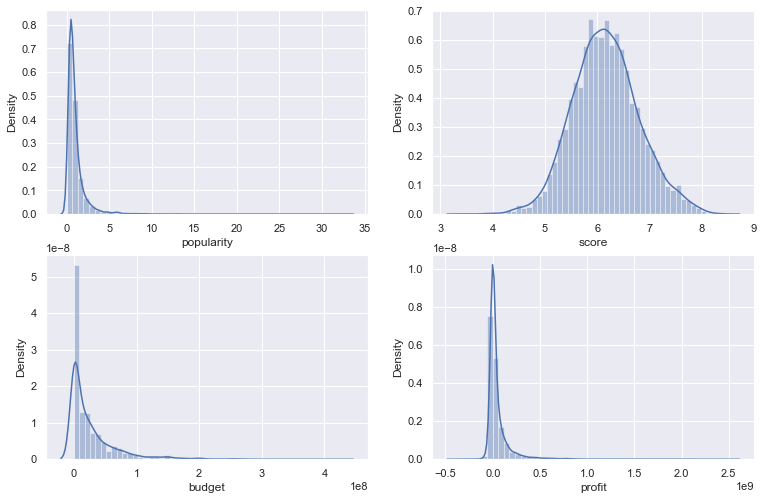

In [94]:

def plot_multiple_histograms(q_movies, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12.69, 8.27))
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(q_movies[col], kde=True, ax=axs)
            else:
                sns.distplot(q_movies[col], kde=True, ax=axs[j])
        else:
            sns.distplot(q_movies[col], kde=True, ax=axs[i, j])

         
plot_multiple_histograms(q_movies, ['popularity','score','budget','profit'])
                                                               

In [97]:
q_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'score', 'Rating_Level',
       'Rating_Rank', 'profit', 'Profit_Level', 'profit1'],
      dtype='object')

In [100]:
q_movies.Profit_Level.value_counts()

Great Profit    2474
Loose Money     2367
Ok Profit        428
No Profit        199
Name: Profit_Level, dtype: int64

Text(0.5, 1.0, '//')

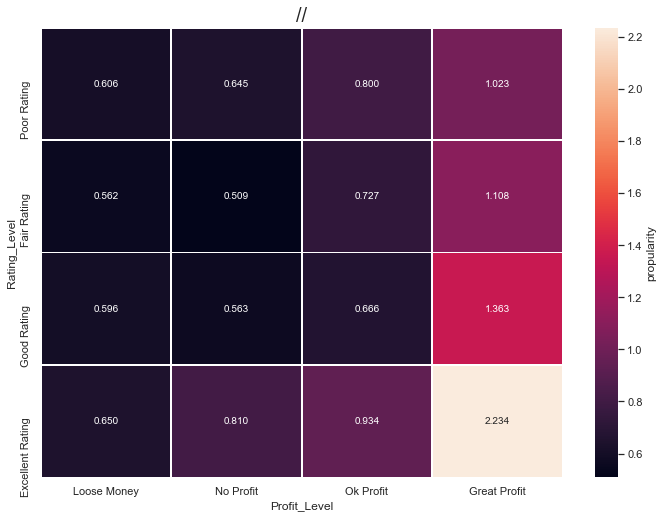

In [101]:
plt.figure(figsize=(11.69, 8.27))
data=q_movies.loc[q_movies['Profit_Level'].isin(['Great Profit','Loose Money','Ok Profit','No Profit'])]
cat_means = q_movies.groupby(['Profit_Level', 'Rating_Level']).mean()['popularity']
cat_means = cat_means.reset_index(name = 'popularity')
cat_means = cat_means.pivot(index = 'Rating_Level', columns = 'Profit_Level',
                            values = 'popularity')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'propularity'},linewidths=.6)

plt.title('//',fontsize=20)